In [123]:
import json
file = json.load(open('./printed_data_info.json'))
print(file.keys()) #dict_keys(['info', 'images', 'annotations', 'licenses'])
# file['info'] #{'name': 'Text in the wild Dataset', 'date_created': '2019-10-14 04:31:48'}
# type(file['images']) #list

dict_keys(['info', 'images', 'annotations', 'licenses'])


In [138]:
print((file['annotations'][600000]))

{'attributes': {'font': '이롭게바탕', 'type': '단어(어절)', 'is_aug': False}, 'id': '02275800', 'image_id': '02275800', 'text': '입사하다'}


In [142]:
print(len(file['images']))

image_id = []
image_text = []

flag = False
point = 0
idx = 0
sum = 0

for obj in file['annotations'] :
    if obj['text'] not in image_text and len(obj['text']) > 1:
        image_id.append(obj['id'])
        image_text.append(obj['text'])
        if flag == False and obj['id'][1] == '3' :
            point = idx
            flag = True
        idx += 1

print(len(image_id))
# print(image_text)
print(sum)


878100
6054
302750


6054
6054
5208
43
7.331516352824579
{'2': 2688, '3': 1378, '4': 1047, '5': 99, '6': 4, '7': 5, '33': 4, '36': 239, '38': 143, '37': 197, '35': 99, '39': 68, '34': 28, '20': 2, '40': 17, '24': 2, '8': 4, '41': 7, '31': 1, '27': 1, '43': 1, '19': 1, '14': 1, '42': 1, '25': 3, '18': 1, '32': 2, '17': 1, '21': 2, '10': 3, '30': 1, '16': 2, '12': 1, '22': 1}
[2688, 1378, 1047, 99, 4, 5, 4, 0, 3, 0, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 2, 3, 0, 1, 0, 0, 1, 1, 2, 4, 28, 99, 239, 197, 143, 68, 17, 7, 1]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


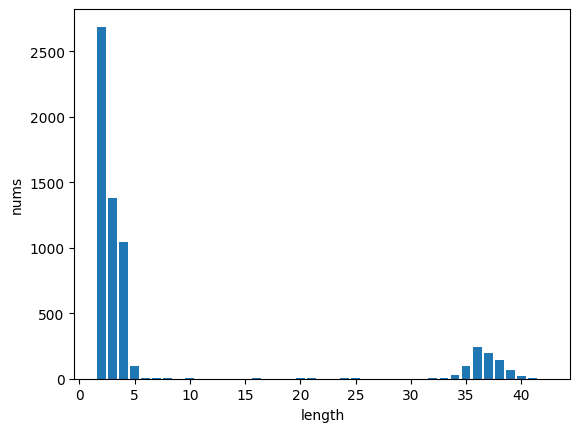

In [159]:
print(len(image_id))
print(len(image_text))
print(point)

image_len_count = {}

max_len = 0
sum_len = 0

for text in image_text :
    max_len = max(max_len, len(text))
    sum_len += len(text)
    if image_len_count.get('{}'.format(len(text))) : 
        image_len_count['{}'.format(len(text))] += 1
    else : 
        image_len_count['{}'.format(len(text))] = 1


print(max_len)
print(sum_len / len(image_text))
print(image_len_count)

import matplotlib.pyplot as plt

length = []
length_num = []
for i in range(2, 43) : 
    if image_len_count.get('{}'.format(i)) : 
        length_num.append(image_len_count['{}'.format(i)])
    else : 
        length_num.append(0)
    length.append(i)

print(length_num)
print(length)

plt.bar(length, length_num, align='center')
plt.xlabel('length')
plt.ylabel('nums')
plt.savefig('dataset.png')

    

In [108]:
import random

image_data = []
for i in range(0, 6054) : 
    (id, text) = (image_id[i], image_text[i])
    image_data.append((id, text))

random.shuffle(image_data)
print(image_data[0][0])

02236210


/Users/sangyeob/ku2022-2/deeplearning/final_project/imagedata/printed


In [120]:
import shutil


f = open("./newdata/raw/train/gt.txt", 'w')

for i in range(1, 5001) : 
    data = "images/image_{:04d}.png\t{}\n".format(i, image_data[i][1])
    if image_data[i][0][1] == '2' :
        shutil.copyfile("./word/{}.png".format(image_data[i][0]), "./newdata/raw/train/images/image_{:04d}.png".format(i))
    else : 
        shutil.copyfile("./sentence/{}.png".format(image_data[i][0]), "./newdata/raw/train/images/image_{:04d}.png".format(i))
    f.write(data)

f.close()

f = open("./newdata/raw/valid/gt.txt", 'w')
for i in range(5001, 5526) : 
    data = "images/image_{:04d}.png\t{}\n".format(i, image_data[i][1])
    if image_data[i][0][1] == '2' :
        shutil.copyfile("./word/{}.png".format(image_data[i][0]), "./newdata/raw/valid/images/image_{:04d}.png".format(i))
    else : 
        shutil.copyfile("./sentence/{}.png".format(image_data[i][0]), "./newdata/raw/valid/images/image_{:04d}.png".format(i))
    f.write(data)
f.close()
    
    
f = open("./newdata/raw/test/gt.txt", 'w')
for i in range(5526, 6001) : 
    data = "images/image_{:04d}.png\t{}\n".format(i, image_data[i][1])
    if image_data[i][0][1] == '2' :
        shutil.copyfile("./word/{}.png".format(image_data[i][0]), "./newdata/raw/test/images/image_{:04d}.png".format(i))
    else : 
        shutil.copyfile("./sentence/{}.png".format(image_data[i][0]), "./newdata/raw/test/images/image_{:04d}.png".format(i))
    f.write(data)
f.close()

In [102]:
pip install fire

Note: you may need to restart the kernel to use updated packages.


In [113]:
cd deep-text-recognition-benchmark

/Users/sangyeob/ku2022-2/deeplearning/final_project/imagedata/printed/deep-text-recognition-benchmark


In [106]:
ls ..

01_printed_sentence_images.zip*  deep-text-recognition-benchmark/
Untitled.ipynb                   newdata/
data/                            printed_data_info.json*
data2/                           sentence/
data_lmdb.ipynb                  syllable/
data_preprocessing.ipynb         word/
data_resize.ipynb


In [114]:
!python3 create_lmdb_dataset.py \
        --inputPath ../newdata/raw/train/ \
        --gtFile ../newdata/raw/train/gt.txt \
        --outputPath ../newdata/lmdb/train/

Written 1000 / 5000
Written 2000 / 5000
Written 3000 / 5000
Written 4000 / 5000
Written 5000 / 5000
Created dataset with 5000 samples


In [115]:
!python3 create_lmdb_dataset.py \
        --inputPath ../newdata/raw/valid/ \
        --gtFile ../newdata/raw/valid/gt.txt \
        --outputPath ../newdata/lmdb/valid/

Created dataset with 525 samples


In [116]:
!python3 create_lmdb_dataset.py \
        --inputPath ../newdata/raw/test/ \
        --gtFile ../newdata/raw/test/gt.txt \
        --outputPath ../newdata/lmdb/test/

Created dataset with 475 samples
